In [27]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Superstore_Raw_5000.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())

print("Number of duplicate:",df.duplicated(subset=['Order ID','Customer ID']).sum())

   Order ID Customer ID Customer Name    Segment         Category  \
0  ORD10000    CUST8270    Customer_0   Consumer        Furniture   
1  ORD10001    CUST1860    Customer_1   Consumer        Furniture   
2  ORD10002    CUST6390    Customer_2   Consumer  Office Supplies   
3  ORD10003    CUST6191    Customer_3  Corporate  Office Supplies   
4  ORD10004    CUST6734    Customer_4   Consumer  Office Supplies   

  Sub-Category   Region  Order Date   Ship Date   Sales  Quantity  Discount  \
0        Table  Central  2022-10-19  2022-10-28  477.60         9       0.0   
1        Table     West  2022-06-03  2022-06-06  615.26         9       0.0   
2      Storage    South  2022-05-13  2022-05-14  115.67         9       NaN   
3         Pens     West  2023-08-09  2023-08-13  564.81         2       0.1   
4      Binders  Central  2022-10-01  2022-10-08   82.92         3       0.3   

   Profit  
0  -65.46  
1   43.39  
2   -6.21  
3   81.60  
4  -16.57  
<class 'pandas.core.frame.DataFrame'>


In [4]:
df.fillna({'Sales':0 ,'Discount':0 ,'Profit':0 }, inplace = True)
df.isnull().sum()

df.drop_duplicates(subset = ['Order ID','Customer ID'], inplace = True)
df.duplicated(subset=['Order ID','Customer ID']).sum()

0

In [5]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       5000 non-null   object        
 1   Customer ID    5000 non-null   object        
 2   Customer Name  5000 non-null   object        
 3   Segment        5000 non-null   object        
 4   Category       5000 non-null   object        
 5   Sub-Category   5000 non-null   object        
 6   Region         5000 non-null   object        
 7   Order Date     5000 non-null   datetime64[ns]
 8   Ship Date      5000 non-null   datetime64[ns]
 9   Sales          5000 non-null   float64       
 10  Quantity       5000 non-null   int64         
 11  Discount       5000 non-null   float64       
 12  Profit         5000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 546.9+ KB


In [26]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Profit Ratio'] = (df['Profit']/df['Sales']).round(2)
df.head(10)

,Order ID,Customer ID,Customer Name,Segment,Category,Sub-Category,Region,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Year,Month,Profit Ratio
0,ORD10000,CUST8270,Customer_0,Consumer,Furniture,Table,Central,2022-10-19,2022-10-28,477.60,9,0.0,-65.46,2022,10,-0.14
1,ORD10001,CUST1860,Customer_1,Consumer,Furniture,Table,West,2022-06-03,2022-06-06,615.26,9,0.0,43.39,2022,6,0.07
2,ORD10002,CUST6390,Customer_2,Consumer,Office Supplies,Storage,South,2022-05-13,2022-05-14,115.67,9,0.0,-6.21,2022,5,-0.05
3,ORD10003,CUST6191,Customer_3,Corporate,Office Supplies,Pens,West,2023-08-09,2023-08-13,564.81,2,0.1,81.60,2023,8,0.14
4,ORD10004,CUST6734,Customer_4,Consumer,Office Supplies,Binders,Central,2022-10-01,2022-10-08,82.92,3,0.3,-16.57,2022,10,-0.20
5,ORD10005,CUST7265,Customer_5,Home Office,Office Supplies,Pens,West,2023-11-28,2023-11-29,549.41,5,0.3,-93.49,2023,11,-0.17
6,ORD10006,CUST1466,Customer_6,Corporate,Technology,Accessories,Central,2023-05-24,2023-05-26,557.17,1,0.5,9.07,2023,5,0.02
7,ORD10007,CUST5426,Customer_7,Corporate,Furniture,Chair,East,2022-12-19,2022-12-24,875.69,4,0.5,244.40,2022,12,0.28
8,ORD10008,CUST6578,Customer_8,Home Office,Technology,Phones,Central,2022-01-05,2022-01-14,727.81,5,0.1,178.62,2022,1,0.25
9,ORD10009,CUST9322,Customer_9,Home Office,Office Supplies,Storage,East,2022-10-20,2022-10-21,257.06,9,0.0,76.35,2022,10,0.30


In [34]:
df.to_csv('Superstore_cleaned_dataset.csv', index = False)

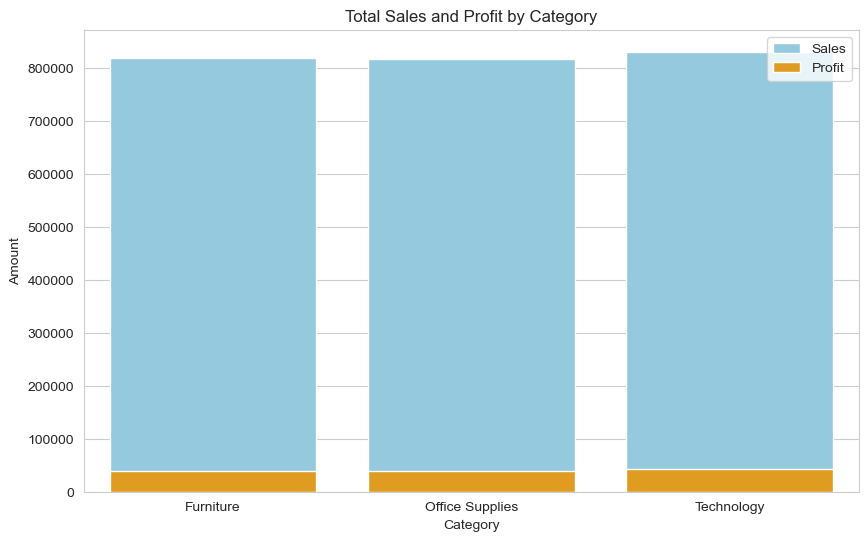

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
category_summary = df.groupby('Category')[['Sales','Profit']].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', data=category_summary, color='skyblue', label='Sales')
sns.barplot(x='Category', y='Profit', data=category_summary, color='orange', label='Profit')
plt.title('Total Sales and Profit by Category')
plt.ylabel('Amount')
plt.legend()
plt.show()

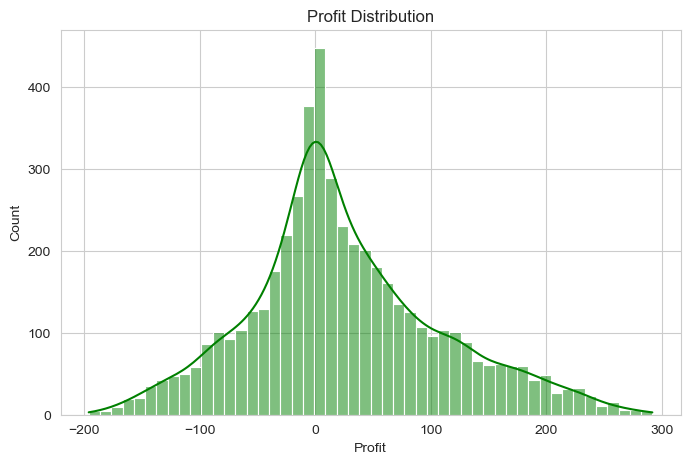

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=50, kde=True, color='green')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.show()

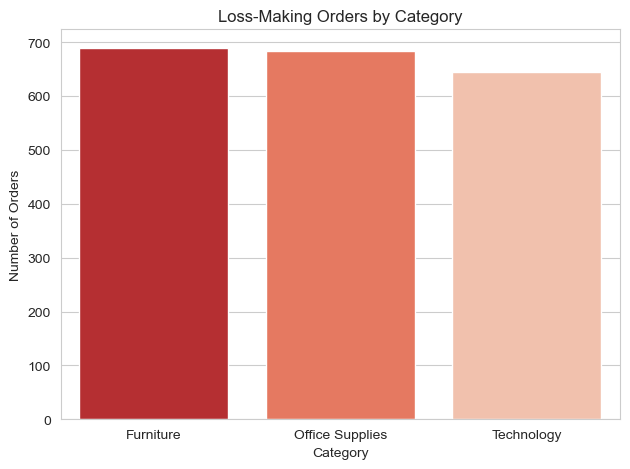

In [23]:
sns.countplot(
    x='Category',
    hue='Category',
    data=loss_orders,
    palette='Reds_r',
    legend=False
)
plt.title("Loss-Making Orders by Category")
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

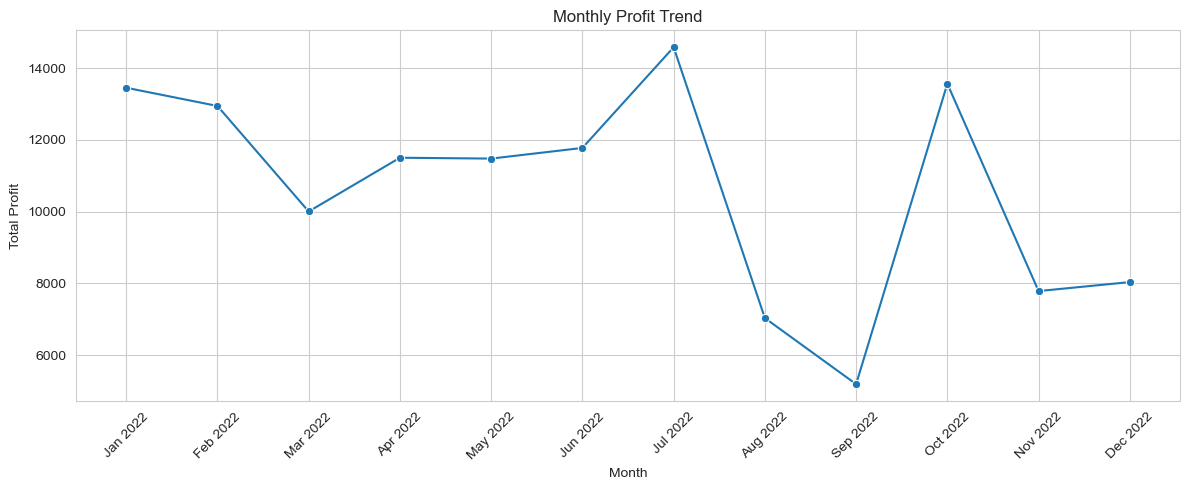

In [29]:
dates = pd.date_range(start='2022-01-01', periods=12, freq='ME')
monthly_profit = pd.DataFrame({
    'Month_Year': dates.strftime('%b %Y'),
    'Profit': np.random.randint(5000, 15000, size=12)})

plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_profit,
    x='Month_Year',
    y='Profit',
    marker='o'
)
plt.xticks(rotation=45)
plt.title("Monthly Profit Trend")
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

In [31]:
loss_subcat = df[df['Profit'] < 0]
loss_subcat_grouped = (
    loss_subcat
    .groupby('Sub-Category')['Profit']
    .sum()
    .reset_index()
    .sort_values('Profit')
    .head(10)
)

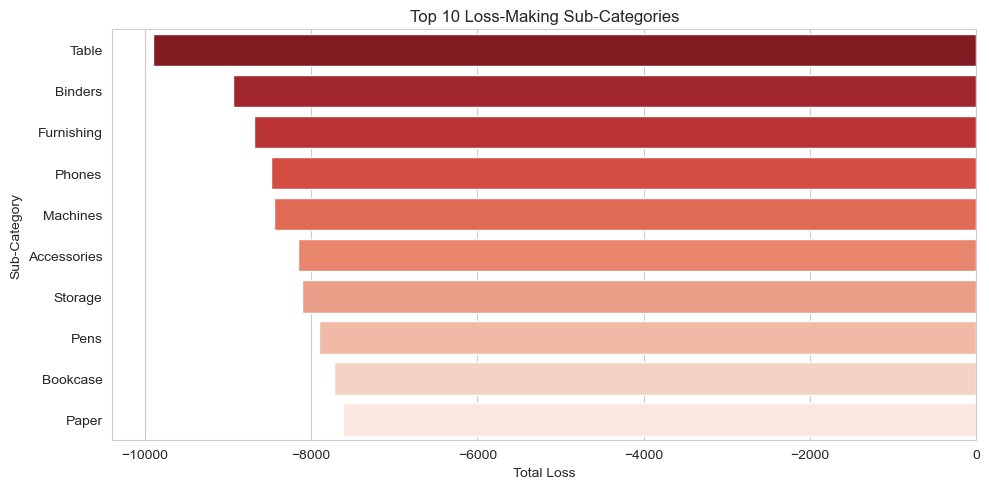

In [32]:
plt.figure(figsize=(10,5))

sns.barplot(
    data=loss_subcat_grouped,
    x='Profit',
    y='Sub-Category',
    hue='Sub-Category',
    palette='Reds_r',
    legend=False
)

plt.title("Top 10 Loss-Making Sub-Categories")
plt.xlabel("Total Loss")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()